Projekt Pronájmy bytů:V tomto projektu budete analyzovat data ze stránky `www.sreality.cz`. Budete tedy získávat aktuální nabídku bytů ve Zlíně

V tomto projektu budete analyzovat data ze stránky `www.sreality.cz`. Budete tedy získávat aktuální nabídku bytů ve Zlíně.
Projekt se dělí na 2 části:
1. WebScraping - pomocí knihovny `BeautifulSoup` získejte všechny aktuální inzerce bytů v daném městě. 
- Získáte **tyto** informace: `URL odkaz bytu, rozměry bytu, kompozice bytu, cena bytu, lokace bytu (Ulice+město)`
2. Datová analýza - ETL proces
- V první fázi prověďte processing dat tak, aby obsahovala příslušné datové typy, nenulové hodnoty atp. Ulice i město bude v samostatných sloupcích.
- Zprocesovaná a vyčištěná data vyexportujte do `.csv` souboru s názvem `{vašeJméno}_zdrojová_data.csv`
3. Datová analýza - analýza dat
- Třetí část začněte tak, že si do dataframe nahrajete vámi vyexportovaný `.csv` soubor s vyscrapovanými daty.
- Ve druhé fázi proveďte analýzu dat a odpovězte na tyto dotazy:
- `Jaká je průměrná cena bytů?`
- `Jaká je průměrná cena bytů pro každou kompozici (1+1, 2+1, atp.)? Zobrazte i na grafu.`
- `Jaká je průměrná velikost bytu pro každou kompozici?`
- `Existuje ulice, kde je vyšší koncentrace dražších bytů?`
- `Jaký typ kompozice je v daném městě nejčastěji inzerovan? Který to je? Proč myslíte, že tomu tak je?`
- `Existují zde inzerce bytů, které stojí více, než 20.000,-? Pokud ano, jsou v této cenové hladině inzerovány i maximálně dvoupokojové byty (2+1/2+kk)?`
- `Zjištěte minimální a maximální inzerce pro každou kompozici bytu. Která kompozice má největší rozptyl mezi minimální a maximální inzerovanou cenou?

In [1]:
from bs4 import BeautifulSoup
import requests

def process_page(data):
    soup = BeautifulSoup(data, 'html.parser')
    bytu = soup.findAll('li', 'MuiGrid-root MuiGrid-item css-l1328q')
    Pronajm = []
    for byt in bytu:
        pokoj, Metrů_v_bytě, cena, ulice, mesto, link_tag = None, None, None, None, None, None
        info_byty = byt.find('div', 'MuiBox-root css-n6y9a7')
        if info_byty is None:
            continue
        element1_byt = byt.find('p', class_='MuiTypography-root MuiTypography-body1 css-13ztabn')
        if element1_byt:
            element_text = element1_byt.text.strip().replace('\xa0', ' ')
            rozdel = element_text.split()
            if len(rozdel) > 4:
                pokoj = rozdel[2]
                Metrů_v_bytě = rozdel[3] + ' ' + rozdel[4]

        element2_byt = byt.find('p', class_='MuiTypography-root MuiTypography-body1 css-1ndcg2e')
        if element2_byt:
            cena = element2_byt.text.strip().replace('\xa0', ' ')

        element3_byt = byt.findAll('p', class_='MuiTypography-root MuiTypography-body1 css-13ztabn')
        if len(element3_byt) > 1 and ',' in element3_byt[1].text:
            rozdel = element3_byt[1].text.split(',')
            ulice = rozdel[0].strip()
            mesto = rozdel[1].strip()

        url_link = byt.find('a', href=True)
        if url_link:
            link = url_link['href']
            if not link.startswith('http'):
                link_tag = 'https://www.sreality.cz' + link
            else:
                link_tag = link

        Pronajm.append({
            'Pokoj': pokoj,
            'Metrů_v_bytě': Metrů_v_bytě,
            'Cena': cena,
            'Ulice': ulice,
            'Město': mesto,
            'URL': link_tag
        })

    return Pronajm

strana = 1
mesto = 'zlin'
all_data = []

while True:
    data = requests.get(f'https://www.sreality.cz/hledani/pronajem/byty/{mesto}?strana={strana}').text
    current_data = process_page(data)
    all_data.extend(current_data)

    soup = BeautifulSoup(data, 'html.parser')
    button = soup.find('button', 'MuiButtonBase-root MuiButton-root MuiButton-outlined MuiButton-outlinedInherit MuiButton-sizeMedium MuiButton-outlinedSizeMedium MuiButton-colorInherit MuiButton-root MuiButton-outlined MuiButton-outlinedInherit MuiButton-sizeMedium MuiButton-outlinedSizeMedium MuiButton-colorInherit css-lp5ywq')

    if not button or button.text != 'Další stránka':
        print('Již zde není žádná další strana. Končím')
        break

    strana += 1
    print(f'Scrapuju stránku č. {strana}')


for item in all_data:
    print(f"Pokoj: {item['Pokoj']}")
    print(f"Metrů_v_bytě: {item['Metrů_v_bytě']}")
    print(f"Cena: {item['Cena']}")
    print(f"Ulice: {item['Ulice']}")
    print(f"Město: {item['Město']}")
    print(f"URL: {item['URL']}")
    print("-" * 40)
import pandas as pd    
df = pd.DataFrame(all_data)
file_name = "Sergio_zdrojová_data.csv" 
df.to_csv(file_name, index=False, encoding='utf-8')
print(f"Data byla úspěšně exportována do souboru: {file_name}")

Scrapuju stránku č. 2
Scrapuju stránku č. 3
Scrapuju stránku č. 4
Scrapuju stránku č. 5
Scrapuju stránku č. 6
Scrapuju stránku č. 7
Scrapuju stránku č. 8
Již zde není žádná další strana. Končím
Pokoj: 2+1
Metrů_v_bytě: 45 m²
Cena: 15 500 Kč/měsíc
Ulice: Budovatelská
Město: Zlín
URL: https://www.sreality.cz/detail/pronajem/byt/2+1/zlin-zlin-budovatelska/2822382156
----------------------------------------
Pokoj: 1+1
Metrů_v_bytě: 47 m²
Cena: 14 000 Kč/měsíc
Ulice: L. Váchy
Město: Zlín - Prštné
URL: https://www.sreality.cz/detail/pronajem/byt/1+1/zlin-prstne-l-vachy/832643660
----------------------------------------
Pokoj: 2+1
Metrů_v_bytě: 62 m²
Cena: 19 500 Kč/měsíc
Ulice: Husova
Město: Napajedla
URL: https://www.sreality.cz/detail/pronajem/byt/2+1/napajedla-napajedla-husova/3454083660
----------------------------------------
Pokoj: 2+kk
Metrů_v_bytě: 70 m²
Cena: 19 000 Kč/měsíc
Ulice: Na Požáře
Město: Zlín
URL: https://www.sreality.cz/detail/pronajem/byt/2+kk/zlin-zlin-na-pozare/514545

1.Čtení CSV souboru    2.Rozdělení řetězců ve sloupci 'Cena'    3.Vytvoření nového sloupce 'Mena'

In [2]:
df = pd.read_csv('Sergio_zdrojová_data.csv', sep=',')
df['Mena']=df['Cena'].str.split().str[2] 

1.Čištění dat      2.Odstranění znaků      3.Převod na číselný formát

In [3]:
df['Metrů_v_bytě'] = (
    df['Metrů_v_bytě']
    .str.strip()                      
    .str.replace('m²', '', regex=False)  
)
df['Metrů_v_bytě'] = pd.to_numeric(df['Metrů_v_bytě'], errors='coerce')

1.Čištění dat     2.Odstranění mezer uvnitř řetězce    3.Odstranění textového přípony a převod

In [4]:
df['Cena'] = (
    df['Cena']
    .str.strip()                 
    .str.replace(' ', '', regex=False) 
    .str.replace('Kč/měsíc', '', regex=False)  
)
df['Cena'] = pd.to_numeric(df['Cena'], errors='coerce')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pokoj         158 non-null    object 
 1   Metrů_v_bytě  157 non-null    float64
 2   Cena          154 non-null    float64
 3   Ulice         141 non-null    object 
 4   Město         141 non-null    object 
 5   URL           158 non-null    object 
 6   Mena          158 non-null    object 
dtypes: float64(2), object(5)
memory usage: 8.8+ KB


1.Skupinování dat podle ulic    2.Extrahování unikátních hodnot pokojů     3.Vytvoření nového DataFrame

In [6]:
Pocet_pokoji=df.groupby('Ulice')['Pokoj'].unique().reset_index(name='Pocet_pokoju')
Pocet_pokoji

,Ulice,Pocet_pokoju
0,Bartošova,[2+kk]
1,Beckovská,[3+1]
2,Benešovo nábřeží,[pokoje]
3,Budovatelská,"[2+1, 3+1]"
4,Chelčického,"[2+1, 3+1]"
...,...,...
74,třída Svobody,"[3+1, 2+kk, 1+kk, 2+1]"
75,třída Tomáše Bati,"[3+1, 4+1, bytu, 3+kk, 2+kk, pokoje]"
76,Česká,"[2+1, 1+1, pokoje]"
77,Ševcovská,[1+1]


1.Seskupení dat podle plochy    2.Výpočet průměrné ceny   3.Vytvoření nového sloupce

In [7]:
Cena_za_Metr=df.groupby('Metrů_v_bytě')['Cena'].mean().reset_index(name='Cena_za_Metr')
Cena_za_Metr

,Metrů_v_bytě,Cena_za_Metr
0,16.0,5600.0
1,17.0,8000.0
2,18.0,7600.0
3,19.0,7500.0
4,20.0,11900.0
...,...,...
62,110.0,22000.0
63,111.0,25000.0
64,114.0,3708.0
65,115.0,15000.0


1.Identifikace unikátních hodnot,pro rychlé zjištění všech různých typů pokojů    

In [8]:
df['Pokoj'].unique()

array(['2+1', '1+1', '2+kk', '1+kk', '3+1', '4+1', '3+kk', '4+kk',
       'pokoje', 'bytu', 'atypický'], dtype=object)

1.Definování podmínek         2.Filtrování DataFrame

In [9]:
podminky = (
    df['Pokoj'].isin(['4+1', '4+kk']) &  # Pokoj je '2+1' nebo '2+kk'
    df['Metrů_v_bytě'].between(10, 130)   # Metry v bytě jsou mezi 30 a 60
)

dvoudopokojove = df.loc[podminky]
dvoudopokojove

,Pokoj,Metrů_v_bytě,Cena,Ulice,Město,URL,Mena
14,4+1,91.0,19000.0,třída Tomáše Bati,Zlín,https://www.sreality.cz/detail/pronajem/byt/4+...,Kč/měsíc
29,4+kk,110.0,25000.0,NaN,NaN,https://www.sreality.cz/detail/pronajem/byt/4+...,Kč/měsíc
87,4+1,83.0,21000.0,Slunečná,Zlín,https://www.sreality.cz/detail/pronajem/byt/4+...,Kč/měsíc
155,4+1,79.0,19000.0,Na Honech II,Zlín,https://www.sreality.cz/detail/pronajem/byt/4+...,Kč/měsíc
156,4+kk,100.0,39900.0,NaN,NaN,https://www.sreality.cz/detail/pronajem/byt/4+...,Kč/měsíc


1.Definice podmínek     2.Přiřazení kategorií    3.Vytvoření nového sloupce

In [15]:
df['Hodnoceni']=df['Cena']
df

,Pokoj,Metrů_v_bytě,Cena,Ulice,Město,URL,Mena,Hodnoceni
0,2+1,45.0,15500.0,Budovatelská,Zlín,https://www.sreality.cz/detail/pronajem/byt/2+...,Kč/měsíc,15500.0
1,1+1,47.0,14000.0,L. Váchy,Zlín - Prštné,https://www.sreality.cz/detail/pronajem/byt/1+...,Kč/měsíc,14000.0
2,2+1,62.0,19500.0,Husova,Napajedla,https://www.sreality.cz/detail/pronajem/byt/2+...,Kč/měsíc,19500.0
3,2+kk,70.0,19000.0,Na Požáře,Zlín,https://www.sreality.cz/detail/pronajem/byt/2+...,Kč/měsíc,19000.0
4,2+1,56.0,12000.0,Dlouhá,Zlín,https://www.sreality.cz/detail/pronajem/byt/2+...,Kč/měsíc,12000.0
...,...,...,...,...,...,...,...,...
153,2+kk,58.0,20000.0,Bartošova,Zlín,https://www.sreality.cz/detail/pronajem/byt/2+...,Kč/měsíc,20000.0
154,2+kk,49.0,18000.0,Tyršovo nábřeží,Zlín,https://www.sreality.cz/detail/pronajem/byt/2+...,Kč/měsíc,18000.0
155,4+1,79.0,19000.0,Na Honech II,Zlín,https://www.sreality.cz/detail/pronajem/byt/4+...,Kč/měsíc,19000.0
156,4+kk,100.0,39900.0,NaN,NaN,https://www.sreality.cz/detail/pronajem/byt/4+...,Kč/měsíc,39900.0


1.Definice podmínek a voleb   2.Aplikace kategorizace  3.Alternativní metoda s loc 4.Seskupení operací  5.Výsledný DataFrame

In [18]:
import numpy as np  
import pandas as pd  
conditions = [
    df['Cena'] < 11000,
    (df['Cena'] >= 11001) & (df['Cena'] < 20000),
    df['Cena'] >= 20001
]
choices = ['cheap', 'normal', 'expensive']
df['Hodnoceni'] = np.select(conditions, choices, default='unknown')



#2 spusob

#df.loc[df['Cena']<11000,'Pronajm'] = 'cheap'
#df.loc[(df['Cena']>=11000) & (df['Cena']<20000),'Pronajm'] = 'normal'
#df.loc[df['Cena']>=20000,'Pronajm'] = 'expensive'

1.Seskupení dat   2.Aplikace agregací

In [19]:
df.groupby('Hodnoceni')['Cena'].agg(['count','min','max','median'])

,count,min,max,median
Hodnoceni,,,,
cheap,33,3708.0,10900.0,8500.0
expensive,12,20690.0,39900.0,24000.0
normal,104,11500.0,19500.0,15000.0
unknown,5,11000.0,20000.0,20000.0


1.Filtrování bytů   2.Výpočet průměrné ceny  3.Zjištění počtu bytů  4.Výpis výsledků

In [20]:
jednopokojový=df.loc[(df['Pokoj'].isin(['1+1', '1+kk']))&(df['Metrů_v_bytě'].between(15,45))]
jednopokojový_prumer=jednopokojový['Cena'].mean()
print(f'Průměrná cena jednopokojového bytu (15-45 m²) je: {jednopokojový_prumer:.2f},- Kč    Počet jednopokojový bytů: {len(jednopokojový)}')

dvoupokojový=df.loc[(df['Pokoj'].isin(['2+1', '2+kk']))&(df['Metrů_v_bytě'].between(45,86))]
dvoupokojový_prumer=dvoupokojový['Cena'].mean()
print(f'Průměrná cena dvoupokojového bytu (45-86 m²) je: {dvoupokojový_prumer:.2f},- Kč     Počet dvoupokojový bytů:  {len(dvoupokojový)}')

třípokojový=df.loc[(df['Pokoj'].isin(['3+1', '3+kk']))&(df['Metrů_v_bytě'].between(50,115))]
třípokojový_prumer=třípokojový['Cena'].mean()
print(f'Průměrná cena třípokojového bytu (50-115 m²) je: {třípokojový_prumer:.2f},- Kč     Počet třípokojový bytů:   {len(třípokojový)}')

čtyřpokojový=df.loc[(df['Pokoj'].isin(['4+1', '4+kk']))&(df['Metrů_v_bytě'].between(79,110))]
čtyřpokojový_prumer=čtyřpokojový['Cena'].mean()
print(f'Průměrná cena čtyřpokojového (79-110 m²) je: {čtyřpokojový_prumer:.2f},- Kč         Počet čtyřpokojový bytů:   {len(čtyřpokojový)}')

pokoje=df.loc[(df['Pokoj'].isin(['pokoje']))&(df['Metrů_v_bytě'].between(17,115))]
pokoje_prumer=pokoje['Cena'].mean()
print(f'Průměrná cena bytu s pokoji (17-115 m²) je: {pokoje_prumer:.2f},- Kč           Počet bytu s pokoji:       {len(pokoje)}')

atypický=df.loc[(df['Pokoj'].isin(['atypický']))&(df['Metrů_v_bytě'].between(19,35))]
atypický_prumer=atypický['Cena'].mean() 
print(f'Průměrná cena atypického bytu (19-35 m²) je: {atypický_prumer:.2f},- Kč          Počet atypických bytů:     {len(atypický)}')



Průměrná cena jednopokojového bytu (15-45 m²) je: 10593.94,- Kč    Počet jednopokojový bytů: 36
Průměrná cena dvoupokojového bytu (45-86 m²) je: 15182.78,- Kč     Počet dvoupokojový bytů:  68
Průměrná cena třípokojového bytu (50-115 m²) je: 17053.45,- Kč     Počet třípokojový bytů:   29
Průměrná cena čtyřpokojového (79-110 m²) je: 24780.00,- Kč         Počet čtyřpokojový bytů:   5
Průměrná cena bytu s pokoji (17-115 m²) je: 6534.22,- Kč           Počet bytu s pokoji:       9
Průměrná cena atypického bytu (19-35 m²) je: 9750.00,- Kč          Počet atypických bytů:     2


1.Zobrazení vyfiltrovaných bytů    2.Výpočet počtu bytů

In [21]:
print(jednopokojový)
print(f'Počet pokoje: {len(jednopokojový)}')


    Pokoj  Metrů_v_bytě     Cena               Ulice               Město  \
5     1+1          25.0   9000.0              Vysoká                Zlín   
8    1+kk          29.0  12000.0                Kúty                Zlín   
9    1+kk          22.0   9900.0             Pančava      Zlín - Příluky   
19   1+kk          32.0      NaN           Smetanova                Zlín   
22   1+kk          25.0   7000.0            V Dolině  Zlín - Jaroslavice   
25   1+kk          33.0  16300.0     Tyršovo nábřeží                Zlín   
32    1+1          36.0  11500.0           Podlesí V                Zlín   
33   1+kk          26.0   8300.0            Tečovská   Zlín - Malenovice   
34   1+kk          31.0      NaN          J. A. Bati                Zlín   
36   1+kk          21.0  14900.0            Zahradní   Zlín - Malenovice   
39   1+kk          41.0      NaN          J. A. Bati                Zlín   
41    1+1          34.0  10000.0              Větrná                Zlín   
50   1+kk   

In [22]:
df.head()

,Pokoj,Metrů_v_bytě,Cena,Ulice,Město,URL,Mena,Hodnoceni
0,2+1,45.0,15500.0,Budovatelská,Zlín,https://www.sreality.cz/detail/pronajem/byt/2+...,Kč/měsíc,normal
1,1+1,47.0,14000.0,L. Váchy,Zlín - Prštné,https://www.sreality.cz/detail/pronajem/byt/1+...,Kč/měsíc,normal
2,2+1,62.0,19500.0,Husova,Napajedla,https://www.sreality.cz/detail/pronajem/byt/2+...,Kč/měsíc,normal
3,2+kk,70.0,19000.0,Na Požáře,Zlín,https://www.sreality.cz/detail/pronajem/byt/2+...,Kč/měsíc,normal
4,2+1,56.0,12000.0,Dlouhá,Zlín,https://www.sreality.cz/detail/pronajem/byt/2+...,Kč/měsíc,normal


#1.Seskupení podle počtu pokojů        2.Nalezení maximální plochy       3.Vytvoření nového DataFrame

In [23]:
Seskupení=df.groupby('Pokoj')['Metrů_v_bytě'].max().reset_index(name='Celkovy pocet')
Seskupení

,Pokoj,Celkovy pocet
0,1+1,47.0
1,1+kk,42.0
2,2+1,120.0
3,2+kk,120.0
4,3+1,115.0
5,3+kk,110.0
6,4+1,91.0
7,4+kk,110.0
8,atypický,35.0
9,bytu,NaN


1.Výpočet statistických hodnot    2.Formátovaný výpis výsledků  3.Shrnutí dat

In [24]:
min_cena = df['Cena'].min()
max_cena = df['Cena'].max()
mean_cena = df['Cena'].mean()
cena_za_metr=df['Metrů_v_bytě'].min()

print(f'Minimální cena: {min_cena:.2f}/Kč\nMaximální cena: {max_cena:.2f}/Kč\nPrůměrná cena: {mean_cena:.2f}/Kč\nCena za metr: {cena_za_metr:.2f}/Kč/m²')


Minimální cena: 3708.00/Kč
Maximální cena: 39900.00/Kč
Průměrná cena: 14359.12/Kč
Cena za metr: 16.00/Kč/m²


In [29]:
df.head(20)

,Pokoj,Metrů_v_bytě,Cena,Ulice,Město,URL,Mena
0,3+1,73.0,19000.0,Slezská,Zlín,https://www.sreality.cz/detail/pronajem/byt/3+...,Kč/měsíc
1,1+1,47.0,14000.0,L. Váchy,Zlín - Prštné,https://www.sreality.cz/detail/pronajem/byt/1+...,Kč/měsíc
2,2+1,62.0,19500.0,Husova,Napajedla,https://www.sreality.cz/detail/pronajem/byt/2+...,Kč/měsíc
3,2+kk,70.0,19000.0,Na Požáře,Zlín,https://www.sreality.cz/detail/pronajem/byt/2+...,Kč/měsíc
4,2+1,56.0,12000.0,Dlouhá,Zlín,https://www.sreality.cz/detail/pronajem/byt/2+...,Kč/měsíc
5,1+1,25.0,9000.0,Vysoká,Zlín,https://www.sreality.cz/detail/pronajem/byt/1+...,Kč/měsíc
6,2+1,57.0,15000.0,Havlíčkova,Otrokovice,https://www.sreality.cz/detail/pronajem/byt/2+...,Kč/měsíc
7,2+kk,50.0,17900.0,Pasecká,Zlín,https://www.sreality.cz/detail/pronajem/byt/2+...,Kč/měsíc
8,1+kk,29.0,12000.0,Kúty,Zlín,https://www.sreality.cz/detail/pronajem/byt/1+...,Kč/měsíc
9,1+kk,22.0,9900.0,Pančava,Zlín - Příluky,https://www.sreality.cz/detail/pronajem/byt/1+...,Kč/měsíc


1.Seskupení podle počtu pokojů      2.Počítání metrů v každé skupině   3.Vytvoření nového DataFrame s výsledky

In [25]:
Seskupení=df.groupby('Pokoj')['Metrů_v_bytě'].value_counts().reset_index(name='Max pocet')
Seskupení

,Pokoj,Metrů_v_bytě,Max pocet
0,1+1,36.0,2
1,1+1,45.0,2
2,1+1,16.0,1
3,1+1,25.0,1
4,1+1,33.0,1
...,...,...,...
101,pokoje,18.0,1
102,pokoje,22.0,1
103,pokoje,58.0,1
104,pokoje,89.0,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pokoj         158 non-null    object 
 1   Metrů_v_bytě  157 non-null    float64
 2   Cena          154 non-null    float64
 3   Ulice         141 non-null    object 
 4   Město         141 non-null    object 
 5   URL           158 non-null    object 
 6   Mena          158 non-null    object 
 7   Hodnoceni     158 non-null    object 
dtypes: float64(2), object(6)
memory usage: 10.0+ KB


1.Import knihovny pro grafy     2.Příprava dat pro graf   3.Vytvoření a nastavení grafu

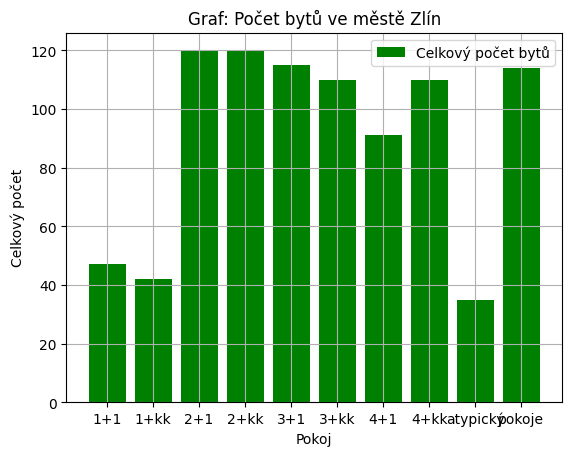

In [27]:
import matplotlib.pyplot as plt

x = Seskupení['Pokoj']  
y = Seskupení['Metrů_v_bytě']   
plt.bar(x, y, label='Celkový počet bytů', color='green')
plt.xlabel('Pokoj')  
plt.ylabel('Celkový počet')
plt.title('Graf: Počet bytů ve městě Zlín')
plt.legend()
plt.grid()
plt.show()

1.Definice kategorií          2.Přiřazení průměrných cen     3.Zaznamenání počtu bytů

In [28]:

kategorie = [
    'Jednopokojový (15-45 m²)',
    'Dvoupokojový (45-86 m²)',
    'Třípokojový (50-115 m²)',
    'Čtyřpokojový (79-110 m²)',
    'Byt s pokoji (17-115 m²)',
    'Atypický (19-35 m²)'
]
prumerne_ceny = [
    10774.19,  # Jednopokojový
    15120.09,  # Dvoupokojový
    17151.67,  # Třípokojový
    24780.00,  # Čtyřpokojový
    6534.22,    # Byt s pokoji
    9750.00    # Atypický 
]
pocet_bytu = [
    39,  # Jednopokojový
    63,  # Dvoupokojový
    31,  # Třípokojový
    4,   # Čtyřpokojový
    9,   # Byt s pokoji
    2    # Atypický
]


1.Vytvoření a nastavení grafu         2.Úprava vzhledu            3.Zobrazení grafu

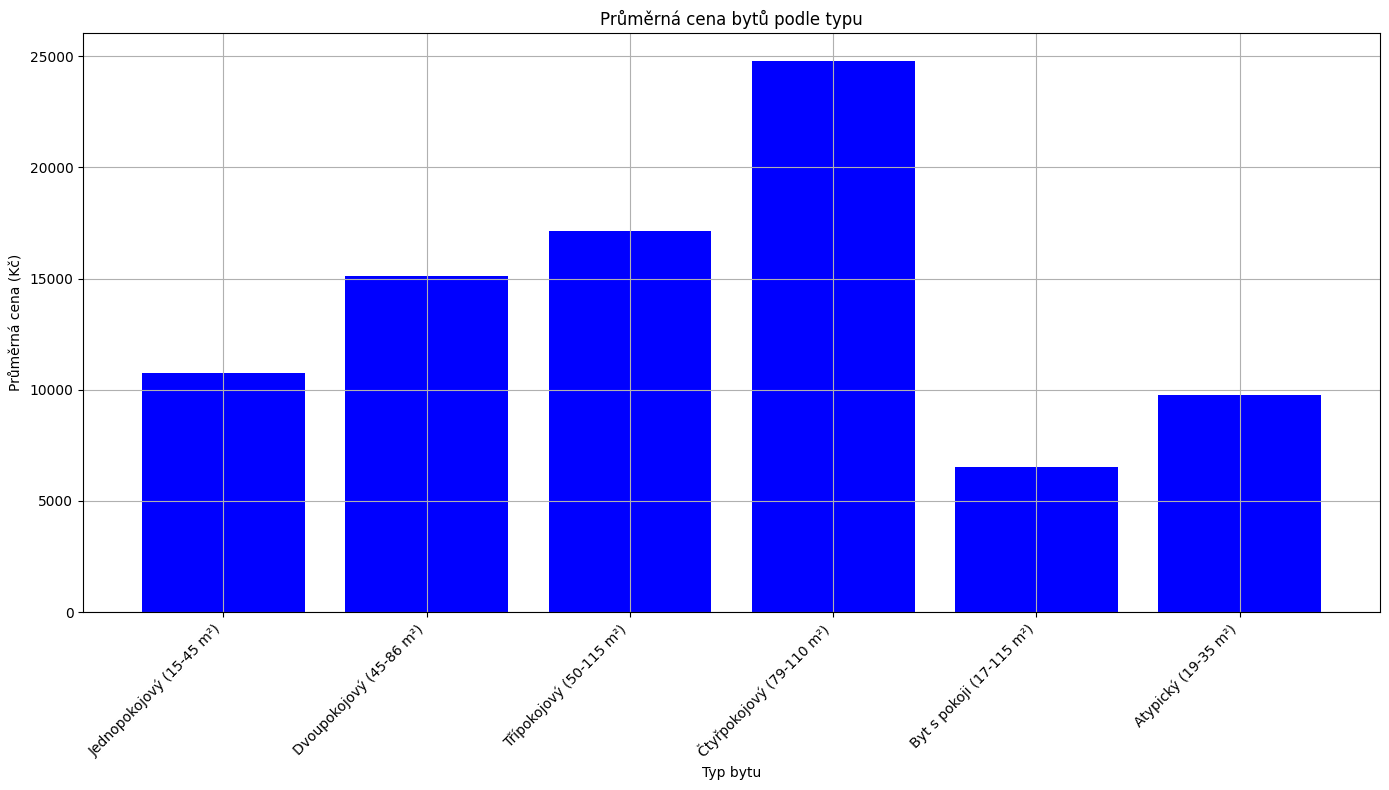

In [29]:
plt.figure(figsize=(14, 8))
plt.bar(kategorie, prumerne_ceny, color='blue')
plt.xlabel('Typ bytu')
plt.ylabel('Průměrná cena (Kč)')
plt.title('Průměrná cena bytů podle typu')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid()
plt.show()


1.Vytvoření a nastavení grafu         2.Úprava vzhledu            3.Zobrazení grafu

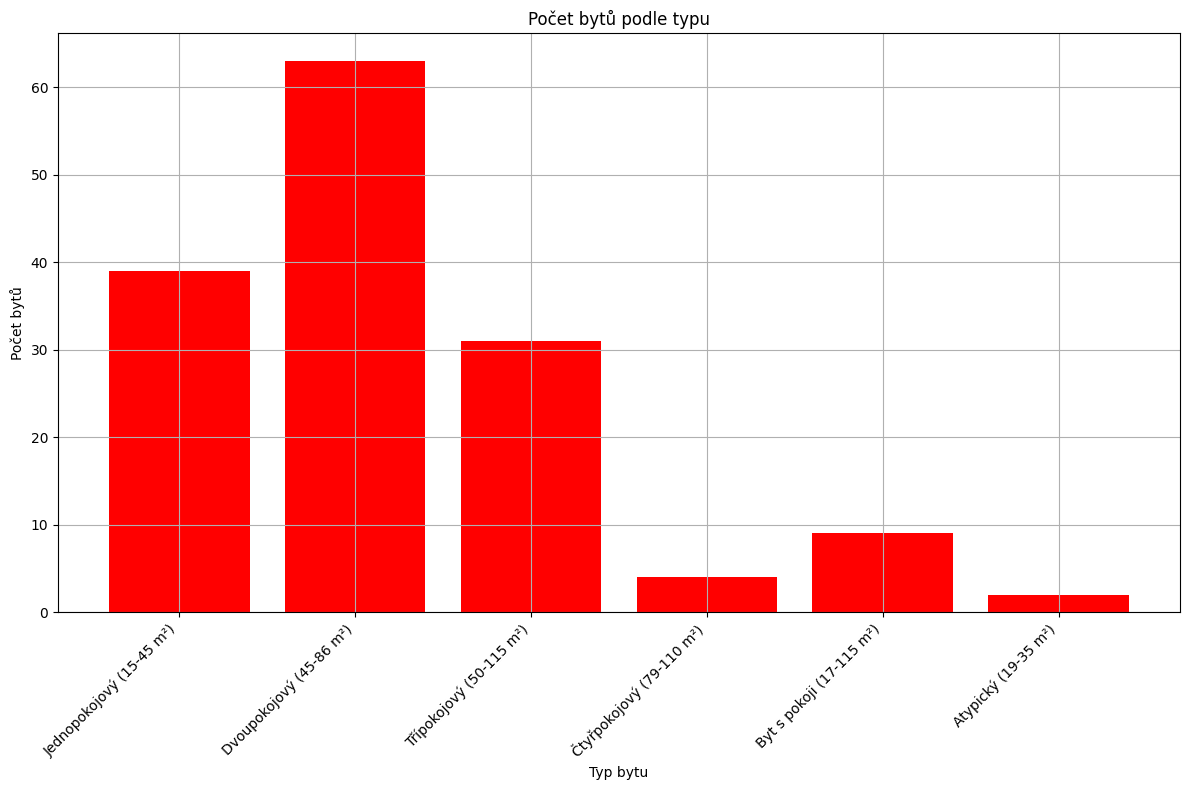

In [30]:
plt.figure(figsize=(12, 8))
plt.bar(kategorie, pocet_bytu, color='red')
plt.xlabel('Typ bytu')
plt.ylabel('Počet bytů')
plt.title('Počet bytů podle typu')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid()
plt.show()
